In [38]:
# import lib
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton
import glob

In [39]:
m = morton.Morton(dimensions=2, bits=18)
def set_value(data,key1,key2):    
    return m.pack(int(data[key1]), int(data[key2]))


In [40]:
def load_data_encode_with_morton(fileName,key1,key2,ts_key,offset=0,multiplier=1):
    df = pd.read_csv(fileName, sep=';', usecols = [ts_key,key1,key2])
    df=df.dropna()
    df[key1]=df[key1].add(offset)
    df[key2]=df[key2].add(offset)
    df[key1]=df[key1].multiply(multiplier)
    df[key2]=df[key2].multiply(multiplier)
    df['morton']=df.apply(set_value,args=(key1,key2),axis=1)
    return df


In [60]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(filePath,key1,key2,ts_key,offset,multiplier,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15))
    fig.tight_layout(pad=4.0)
    plt.gca().invert_yaxis()
    row_position = 0
    column_position=0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset,multiplier)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='blue',s=0.5)
        ax[row_position,column_position].set_title(file[-5:])
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1


In [42]:
LaneChange_Path_5hz='./data/lane_changes/5hz/'

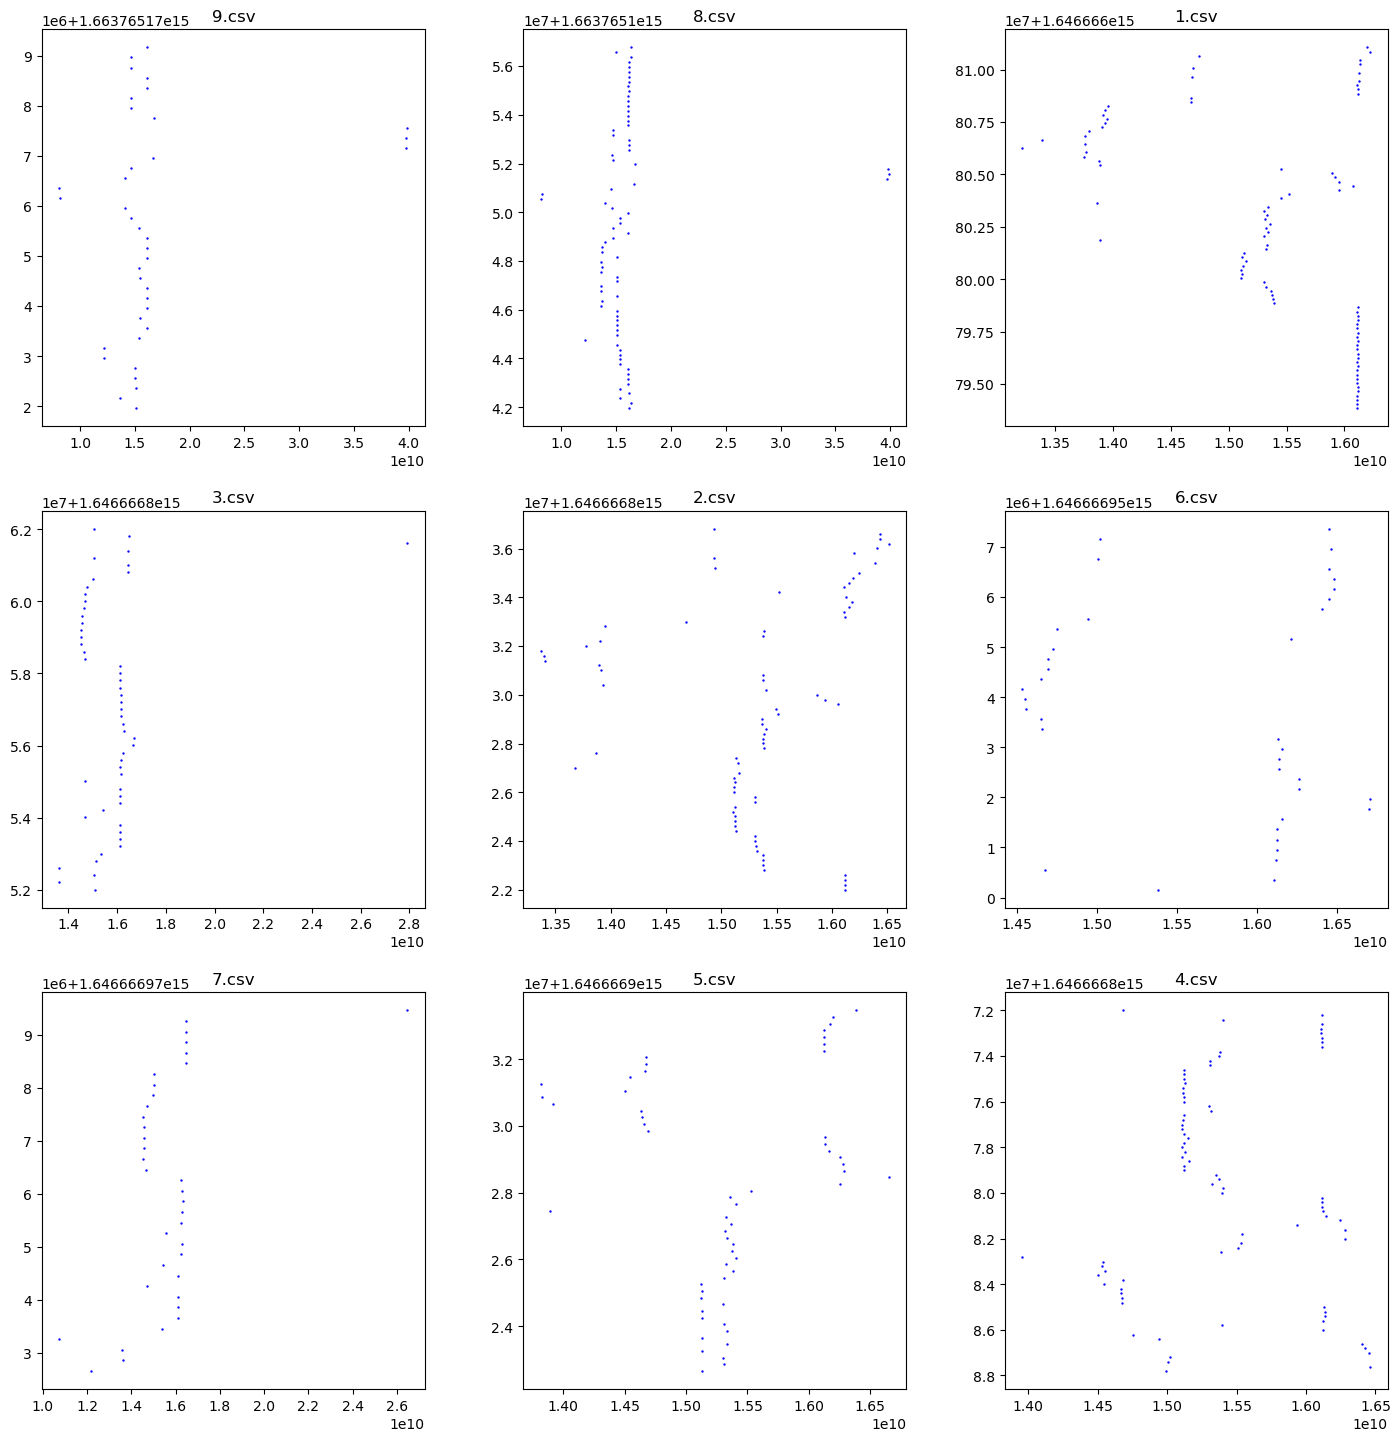

In [61]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',10,10000,3,3)